# **Data Sci Eng Methods**
### **Assignment 1 – ML Data Cleaning and Feature Selection**

##### **By Sri Poojitha Mandali**

####**ML Data Cleaning and Feature Selection** 
In this assignment, you will use a dataset for predictive learning and check the quality of the data and determine which features are important.

#### **Answer the following questions:**

* What are the data types? (Only numeric and categorical)

* Are there missing values?

* What are the likely distributions of the numeric variables?

* Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

* Which independent variables have missing data? How much?

* Do the training and test sets have the same data?

* In the predictor variables independent of all the other predictor variables?

* Which predictor variables are the most important?

* Do the ranges of the predictor variables make sense?

* What are the distributions of the predictor variables?

* Remove outliers and keep outliers (does if have an effect of the final predictive model)?

* Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values? That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

For categorical data, calculate the accuracy and a confusion matrix.

#### **Abstract**
Customer churn has become a major problem in banking industry and banks have always tried to track customer interaction with the company to detect early warning signs in customer’s behavior. Below is the customer data of account holders at ABC Multinational Bank and the aim of the Notebook is to check the quality of the data and determine which features are important.

#### **Variable Description**
* `customer_id` - Account Number of customer

* `credit_score` - credit score of the customer

* `country` - country of residence

* `gender` - sex of the customer

* `age` - age of the customer

* `tenure` - from how many years he/she is having bank acc in ABC Bank

* `balance` - Account Balance in customer account

* `products_number` - Number of product from bank

* `credit_card` - if the customer has credit card? 0 -if no and 1 - if yes

* `active_member` - if he/she is active member of bank ?

* `estimated_salary` - salary of account holder

* `churn` - churn status

#### **Datasets**
* The dataset consists of 11 attributes of the customer which are independent variables like customer_id, credit_score, country, gender, age, tenure, balance, products_number, credit_card, active_member, estimated_salary.
* Churn status attribute is the dependent variable where 1 if the client has left the bank during some period or 0 if he/she has not.
* There a total of 10000 observations in the dataset to track customer behaviour.

In [266]:
#installing dependencies
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [267]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
from sklearn import preprocessing
import statsmodels.api as sm  #importing statsmodel for OLS regression
from statsmodels.graphics.gofplots import qqplot
import missingno as msno

from sklearn import model_selection
from sklearn.model_selection import  train_test_split #for splitting data into train, test and validation data
from sklearn.linear_model import LinearRegression ,LogisticRegression # for fitting to get permutation
from sklearn import datasets, linear_model
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score , precision_score,recall_score,f1_score
from tabulate import tabulate
from sklearn.metrics import mean_squared_error

In [268]:
#Reading the bank churn dataset
df = pd.read_csv("https://raw.githubusercontent.com/sripoojitha-mandali/DataSciEnggMethodsandTools/main/csv/Bank_Customer_Churn_Prediction.csv?token=GHSAT0AAAAAAB6AWSU6RNFAAWFIG5H7TYF2Y6UOZXQ",sep=',')

In [269]:
# saving a copy of original dataset

df_copy = df.copy()

In [270]:
#Viewing sample of bank churn dataset
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [271]:
df.shape

(10000, 12)

The dataset has 10,000 rows and 12 columns

In [272]:
100*df.churn.value_counts(normalize=True)

0    79.63
1    20.37
Name: churn, dtype: float64

Churn data has two classes where 79.63% as 0's and 20.37% as 1's

##### **Check Data types of features in dataset**

In [273]:
df.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [274]:
df.nunique()

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64


#### **Datatypes:**
* `Customer ID` - has integer values to identify a particular customer.
* `Credit Score` - has integer value to determine the creditworthiness of a customer.
* `Country` - The country where customer lives is of 'object' datatype.
* `Gender` - The Sex of customer is of 'object' datatype.
* `Age` - the age of customer is of 'integer' data type.
* `Tenure` - the Number of years the customer has Bank Account in that Bank is of integer datatype.
* `Balance` - Amount of money present in customer's bank is recorded in 'float' datatype.
* `Products Number` - has integer values for number of Products from that Bank.
* `Credit Card` - is a categorical value , yet represented in Integer to check if the customer own a credit card of that Bank.
* `Active Member` - is a categorical value , yet represented in Integer to check whether the customer is an active member of that Bank.
* `Estimated Salary` - Total Income of the Customer is represented as float.
* `Churn` - Churn (Loss of existing customers) of the Bank is a categorical value , yet represented in Integer.

Dataset has **10000** entries and **12** feature with 7 nominal and 5 categorical features with 20.37% Churn Failure observations or customer leaving observations.

**Numerical features** : customer_id, credit_score, tenure, age, balance, product_number, estimated salary

**Categorical features**: country , gender , credit_card , active_number , churn

#### **Missing Value Check**



In [275]:
#checking if the any data is missing
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

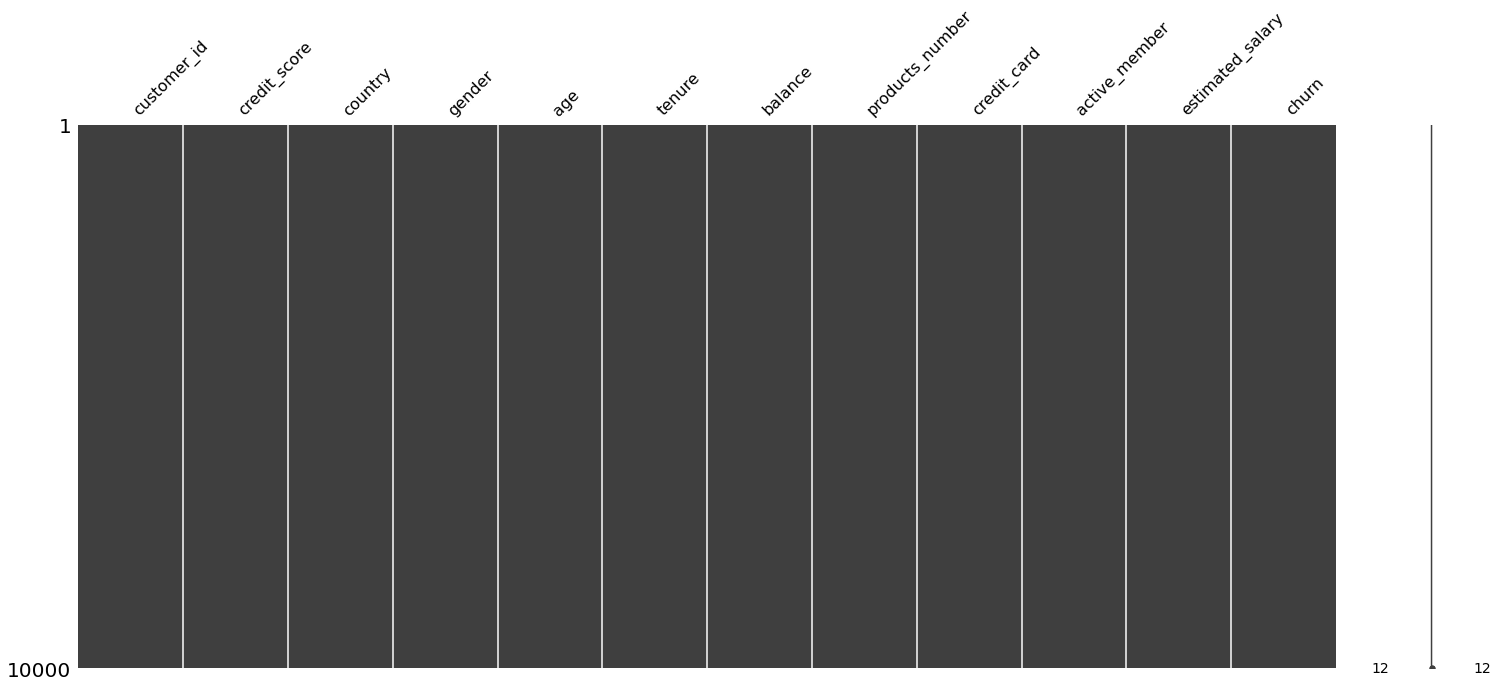

In [276]:
msno.matrix(df)

##### **Which independent variables have missing data ?**

There are no missing values in the data

#### **Dropping feature**  
There is one feature which is can be dropped to improve the accuracy of our predictions. The feature is :

`Customer ID` - Customer ID is randomly allocated to a customer and does not depend on anything.


In [277]:
df = df.drop(["customer_id"],axis = 1)


In [278]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Dropping **customer_id** column as it is just a unique identifiers or number assigned to each customer.


In [279]:
# This gives information about dataset like column data types, column labels, number of columns, 
# number of cell in each column which are not null, range index
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


#### **Univariate analysis**

In [280]:
# provides some statistical information of data in dataframe
df.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


#### **Observations so far:**
* `credit_score` has a mean of 650 and 75% of data is distributed between 652 and 850, seems like a good distribution and may not have outliers.
* `age` has a mean of 38.9 years and maximum data is distributed between 37 years to 45 years, but the maximum value is 92 years which might be slightly right skewed from mean and it looks like investigation is needed to understand outliers and it will be discussed further in this notebook.
* `tenure` has a mean 5 and median is 5 and seems like a normal distribution may not have outliers.
* `balance` has mean 76485.889288 , maximum value is 250898.090000, minimum value is 0 and which is slightly left skewed from mean.
* `estimated_balance` has mean 100090.239881 and a median(2nd quantile) of 100193.915000 which is almost a normal distribution.

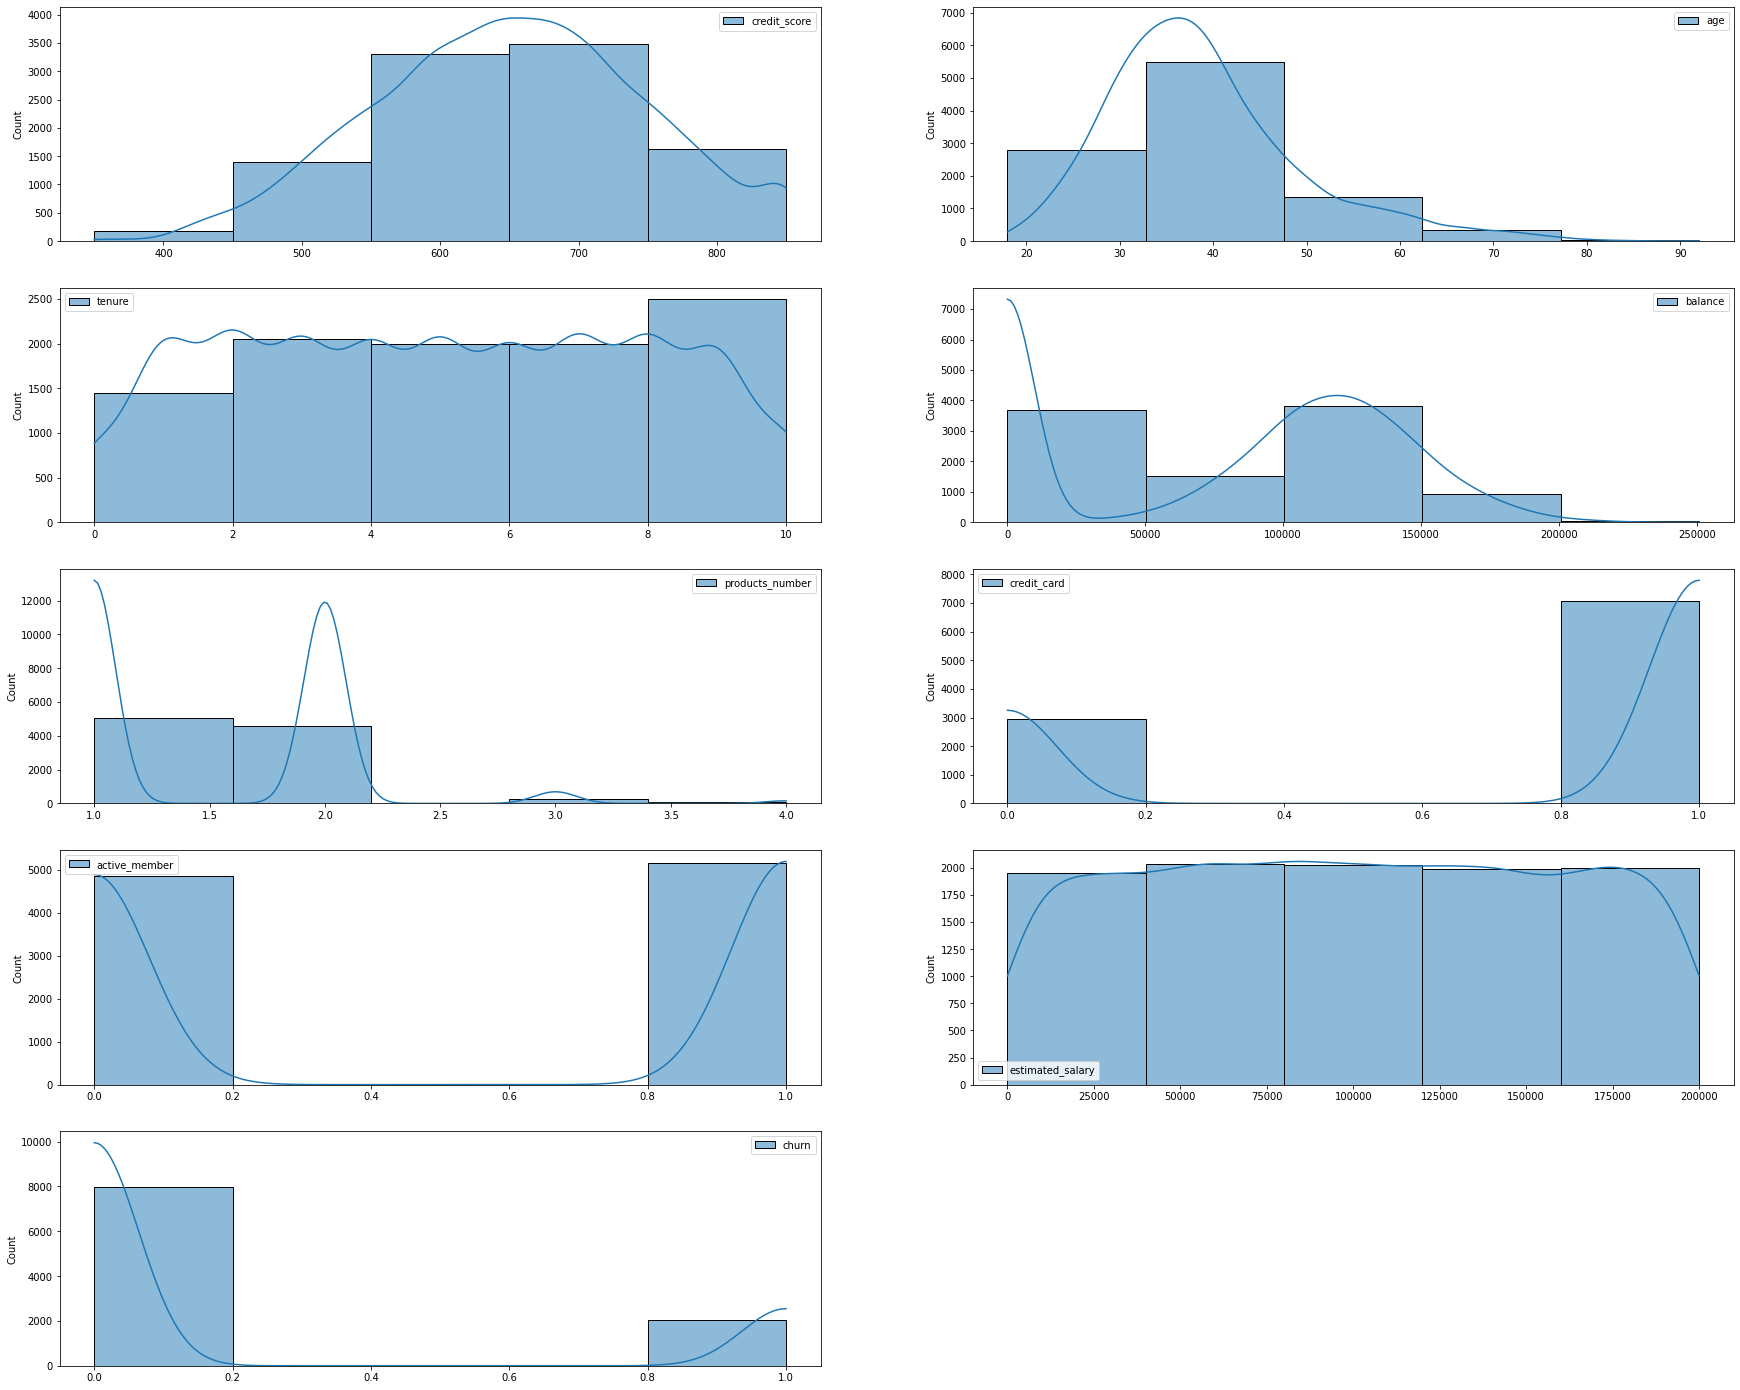

In [281]:
# Histogram plots for continuous features.
numerical_ft = [["credit_score"],["age"],["tenure"],["balance"],["products_number"],["credit_card"],["active_member"],["estimated_salary"],["churn"]]
plt.figure(figsize=(30,25))
for i,col in enumerate(numerical_ft,1):
    plt.subplot(5,2,i)
    sns.histplot(df[col],kde=True,bins = 5)


##### **What are the likely distributions of the numeric variables?**


- `credit_score` looks like a normal distribution , from description mean and median are aligned and 75% of data is close to max value i.e 850.
- `age` has mean 38.92 , median 37 -> slightly right skewed probably due to greater max value , the outlier shifted the mean towards right.This shows that there are potential outliers in this normal distribution. let's understands them better moving forward.
- `balance` is slightly left skewed with max value being around 250898 but 75% of data is close to 127644 thereby projecting that it won't be a normal distribution.
- `estimated_salary` closely follows normal distribution.


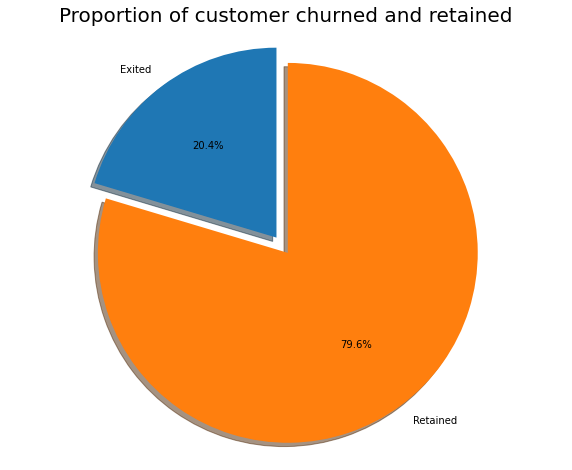

In [282]:
labels = 'Exited', 'Retained'
sizes = [df.churn[df['churn']==1].count(), df.churn[df['churn']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

20.4% of dataset has details of excited customers and 79.6% are still active.

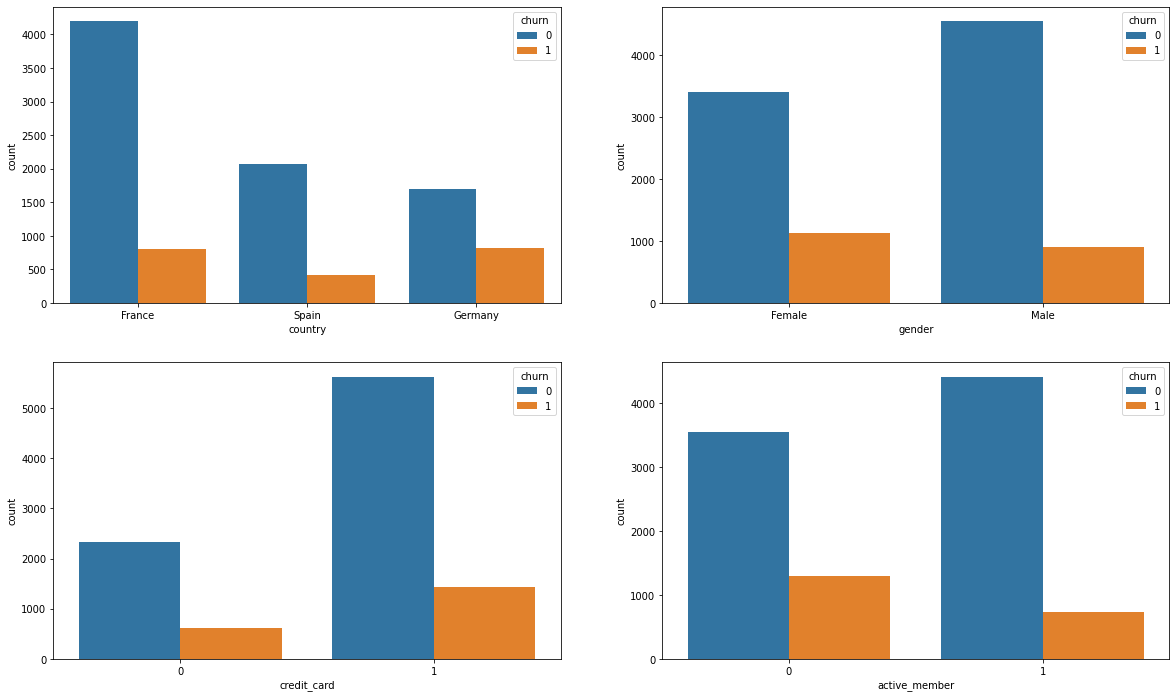

In [283]:
# We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='country', hue = 'churn',data = df, ax=axarr[0][0])
sns.countplot(x='gender', hue = 'churn',data = df, ax=axarr[0][1])
sns.countplot(x='credit_card', hue = 'churn',data = df, ax=axarr[1][0])
sns.countplot(x='active_member', hue = 'churn',data = df, ax=axarr[1][1])

#### **Observations so far :**

* Considering the `country` , it is observed that the majority of the data comes from **French** citizens. However, the proportion of churned customers is **inversely** related to the population of consumers, implying that the bank may be experiencing a problem (maybe a lack of customer service staff) in locations where it has fewer clients.
* The proportion of female clients who churn is also **higher** than the proportion of male customers when checking churn significance with respect to `gender`.
* Surprisingly, the majority of clients that churned used `credit_card`. Given that the majority of consumers having credit cards, this could be a coincidence.
* Predictably, inactive members have more churn. Alarmingly, the overall proportion of inactive members is **fairly high**, implying that the bank may need to create a campaign to convert this group to `active_member`, as this will undoubtedly have a good impact on customer churn.

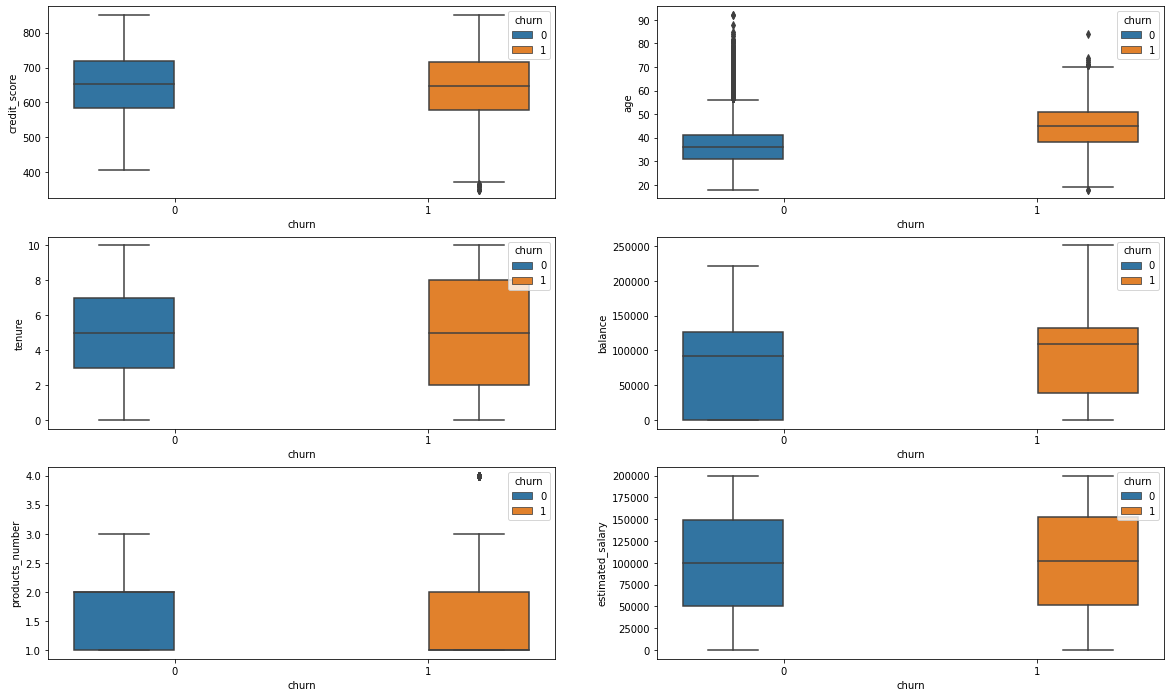

In [284]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='credit_score',x = 'churn', hue = 'churn',data = df, ax=axarr[0][0])
sns.boxplot(y='age',x = 'churn', hue = 'churn',data = df , ax=axarr[0][1])
sns.boxplot(y='tenure',x = 'churn', hue = 'churn',data = df, ax=axarr[1][0])
sns.boxplot(y='balance',x = 'churn', hue = 'churn',data = df, ax=axarr[1][1])
sns.boxplot(y='products_number',x = 'churn', hue = 'churn',data = df, ax=axarr[2][0])
sns.boxplot(y='estimated_salary',x = 'churn', hue = 'churn',data = df, ax=axarr[2][1])

#### **Observations so far :**

* There is no statistically significant variation in the distribution of `credit_score` between retained and churned consumers. 
* The older clients churn at a higher rate than the younger ones, indicating a variation in service preferences between the age groups. The bank may need to reconsider its target market or its retention strategy for different `age ` groups.
* In terms of `tenure`, clients on either end of the spectrum (spent little or a lot of time with the bank) are more likely to churn than those with an average tenure. 
* Concerningly, the bank is losing customers with accounts having large `balance`, which will reduce its available capital for lending.
* However, neither the `product_number` nor the `estimated_salary` have a substantial impact on churn.


#### **Does the data has Outliers?**

Yes, the boxplot shows that there are visible outliers in `age`,`credit_score` and should be imputed moving forward. This should be done before scaling to avoid skewness in data distribution.

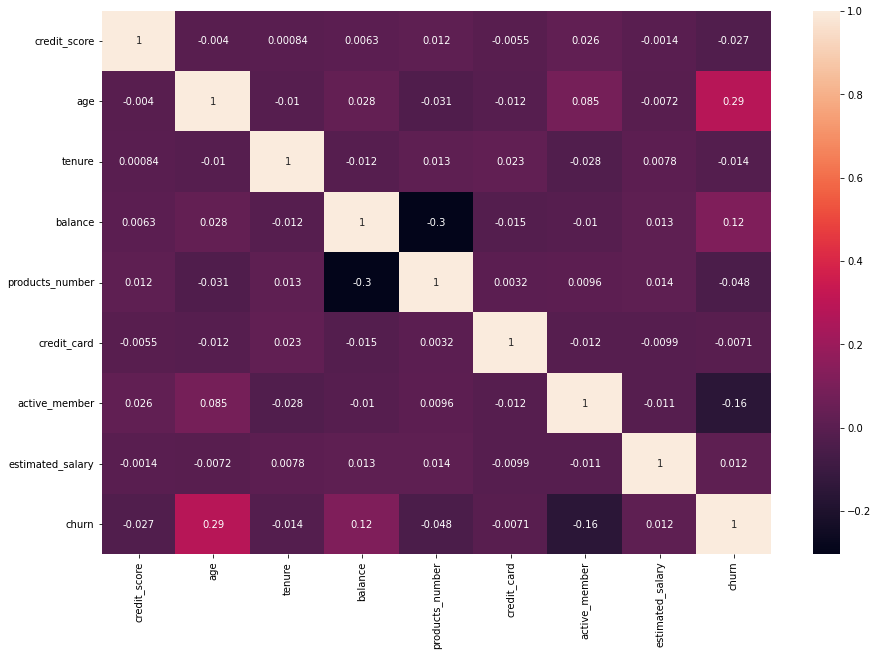

In [285]:
# heatmap

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot = True)

- `age` and `active_member` are slightly positively correlated.
- `balance` and `products_number` are negatively correlated.
- `churn` shows some correlation with `age` comparing to other features.

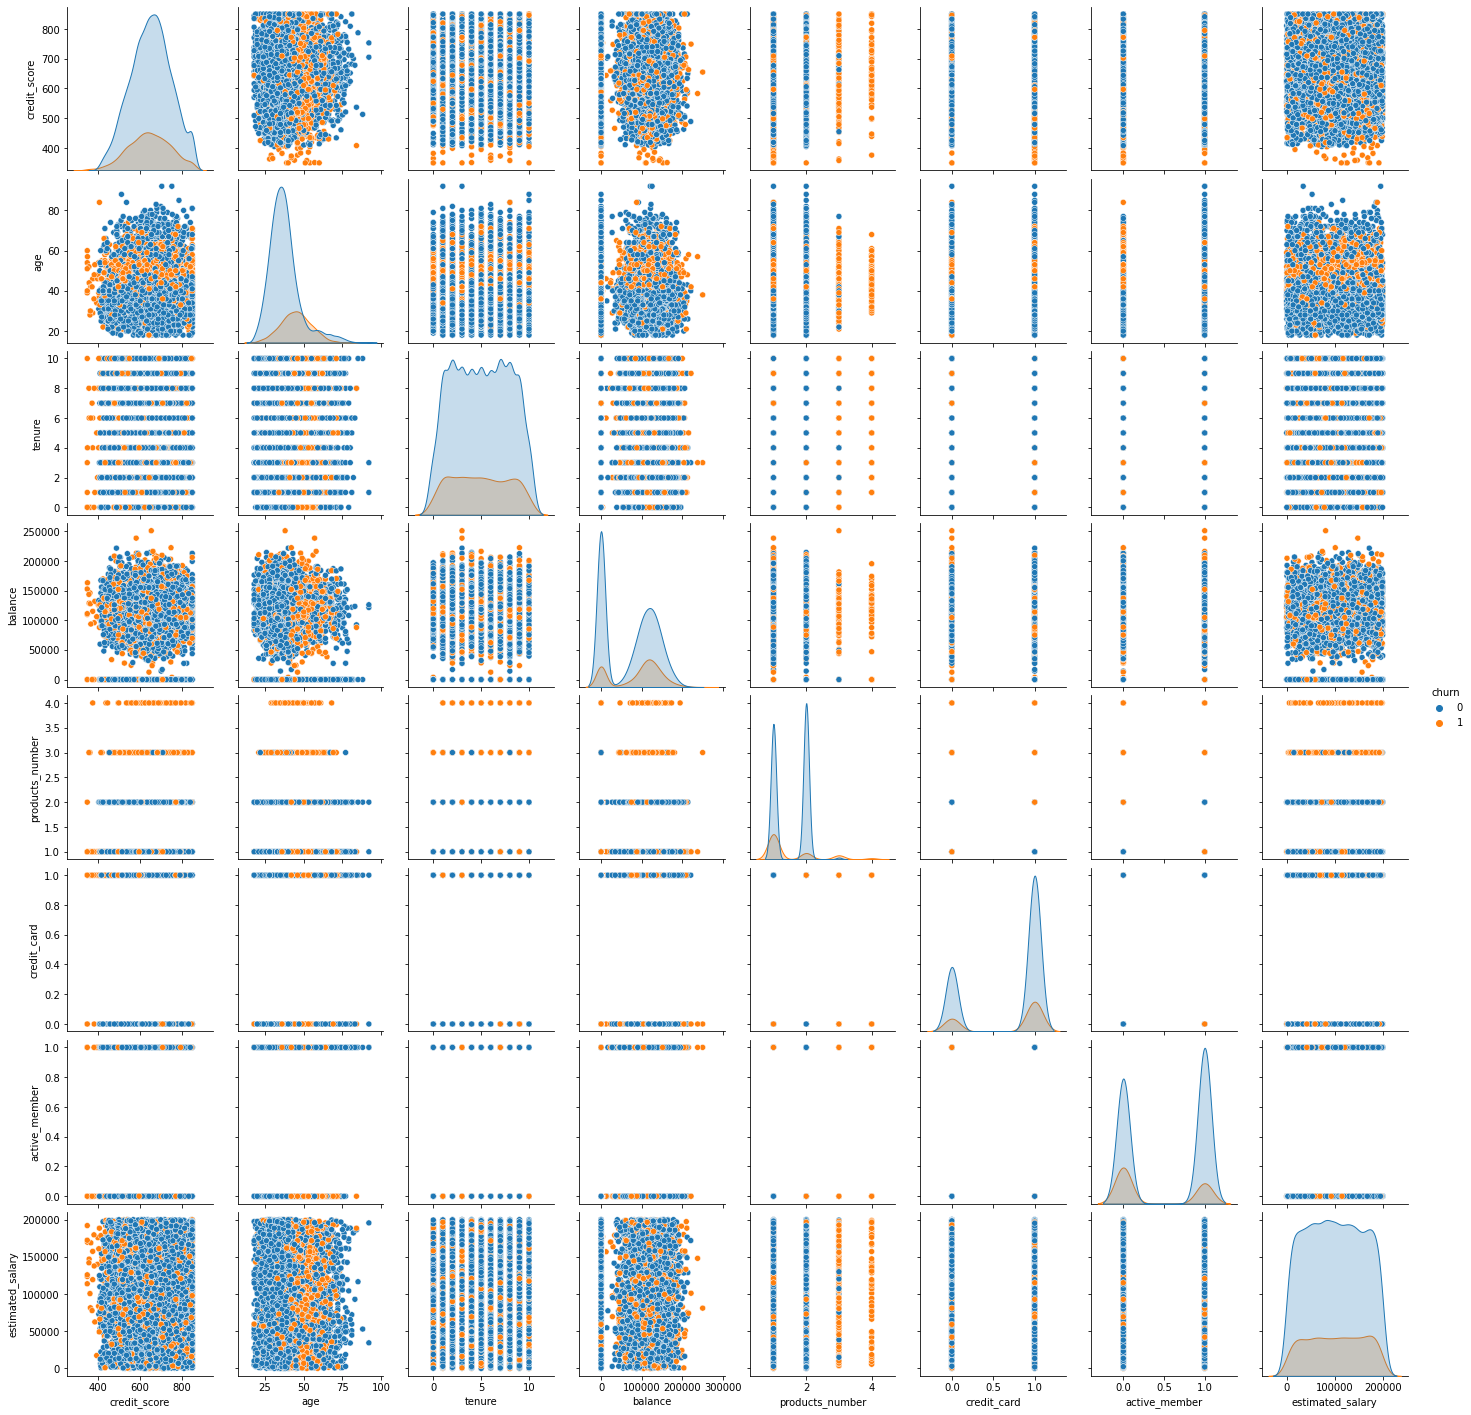

In [286]:
#  To understand relationship between variables
sns.pairplot(df, diag_kind='kde',  hue="churn")

* Correlation matrix shows that `credit_score` have positive correlation with churn.
* We can see that one of our dataset features `estimated_salary` have high positive association with other feature `balance` compare to other numerical features, but it is not that high.
* It seems like there is no significant positve/negative correlation among the features and also with the `churn`.

In [287]:
# saving a copy of df to use it for modeling with outliers
df_with_outliers = df.copy()

#### **Encoding Categorical Data**

In [288]:
df['country'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

Here we can observe that there are only 3 unique values in country which are 'France', 'Spain', 'Germany' and will. be converted to numerical values.

In [289]:
#converting the categorical values of gender and country to numerical values
#df = pd.get_dummies(df, prefix='Is', drop_first=True)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for column in df.columns:
    # Fit the label encoder to the dataframe column
    le.fit(df[column])
    # Replace the dataframe column with the encoded values
    df[column] = le.transform(df[column])

print(df)

      credit_score  country  gender  age  tenure  balance  products_number  \
0              228        0       0   24       2        0                0   
1              217        2       0   23       1      743                0   
2              111        0       0   24       8     5793                2   
3              308        0       0   21       1        0                1   
4              459        2       0   25       2     3696                0   
...            ...      ...     ...  ...     ...      ...              ...   
9995           380        0       1   21       5        0                1   
9996           125        0       1   17      10      124                0   
9997           318        0       0   18       7        0                0   
9998           381        1       1   24       3      427                1   
9999           401        0       0   10       4     4112                0   

      credit_card  active_member  estimated_salary  churn  
0  

In [290]:
df['country'].unique()

array([0, 2, 1])

Here the categorical features like country where France is denoted by 0 , Germany by 1 & spain by 2 and gender in our dataset is converted to numerical value using the Label Encoder function to build the model which is more accurate.

#### **Outlier handling**

Inter Quantile Range Method:
- IQR is a concept in statistics that is used to measure the statistical dispersion and data variability by dividing the dataset into quartiles.
- Q1 (1st Quantile) = df.quantile(0.25)
- Q3 (3rd Quantile)= df.quantile(0.75)
- IQR = Q3-Q1
- LowerLimit = Q1-1.5*IQR
- UpperLimit = Q3+1.5*IQR
why we use 1.5 as a factor --> as Standard Devaiation method, 1 IQR from Q1 & Q2 covers approx ~70% of the data and 2 IQR covers approx ~ 97% of the data. so it is aproximated that 1.5 factor will cover approx ~95% of the data.
Anything outside the`LowerLimit` and `UpperLimit` are can be replaced with Median or Mean or Mode.

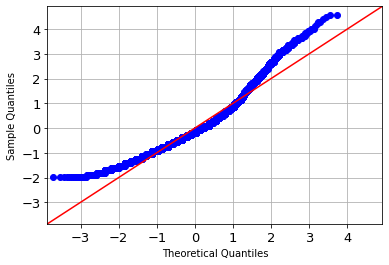

In [291]:
#checking the distribution of feature 'age' before handling the outliers
fig=qqplot(df["age"],line='45',fit='True')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(True)
plt.show()

In [292]:
#  using IQR method to impute outliers
def handle_outliers_iqr(df, feature,fac): # df = dataframe , feature = each feature , fac = 1.5 or 2 based on the use case
    Qan1 = df[f"{feature}"].quantile(0.25)
    Qan3 = df[f"{feature}"].quantile(0.75)
    IQR=Qan3-Qan1
    lower_limit=Qan1-fac*IQR
    upper_limit=Qan3+fac*IQR
    df.loc[(df[feature] < lower_limit) | (df[feature] > upper_limit), feature] = df[feature].mean()
    return df

In [293]:
handle_outliers_iqr(df , "age" , 1.5)
handle_outliers_iqr(df , "credit_score" , 1.5)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,228.0,0,0,24.0,2,0,0,1,1,5068,1
1,217.0,2,0,23.0,1,743,0,0,1,5639,0
2,111.0,0,0,24.0,8,5793,2,1,0,5707,1
3,308.0,0,0,21.0,1,0,1,0,0,4704,0
4,459.0,2,0,25.0,2,3696,0,1,1,3925,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,380.0,0,1,21.0,5,0,1,1,0,4827,0
9996,125.0,0,1,17.0,10,124,0,1,1,5087,0
9997,318.0,0,0,18.0,7,0,0,0,1,2062,1
9998,381.0,1,1,24.0,3,427,1,1,0,4639,1


In [294]:
df[["age"]].describe(), df[["age"]].quantile(0.25), df[["age"]].quantile(0.75)

(                age
 count  10000.000000
 mean      19.832250
 std        8.646199
 min        0.000000
 25%       14.000000
 50%       19.000000
 75%       25.000000
 max       44.000000, age    14.0
 Name: 0.25, dtype: float64, age    25.0
 Name: 0.75, dtype: float64)

#### **Observations so far:**
* It can be observed the outliers have been removed in age as the previous max value was 92 years and now it is 62 years.
* Also the new mean now is 37.83 but previously with the outliers was 38.92 and the standard deviation dropped by 2.


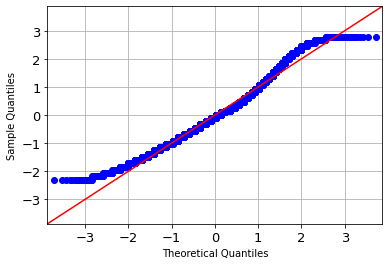

In [295]:
#checking the distribution of independent variable 'age' after removal of outliers
fig=qqplot(df["age"],line='45',fit='True')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(True)
plt.show()

The age festure falls under normal distribution after removal of outliers.

In [296]:
df[["credit_score"]].describe(), df[["credit_score"]].quantile(0.25), df[["credit_score"]].quantile(0.75)

(       credit_score
 count  10000.000000
 mean     259.584600
 std       96.496107
 min        0.000000
 25%      193.000000
 50%      261.000000
 75%      327.000000
 max      459.000000, credit_score    193.0
 Name: 0.25, dtype: float64, credit_score    327.0
 Name: 0.75, dtype: float64)

The outliers in the credit_score feature has also been handled with the removal of outlier in the lower quantile.

#### **Feature Scaling**

#####Do the ranges of the predictor variables make sense?

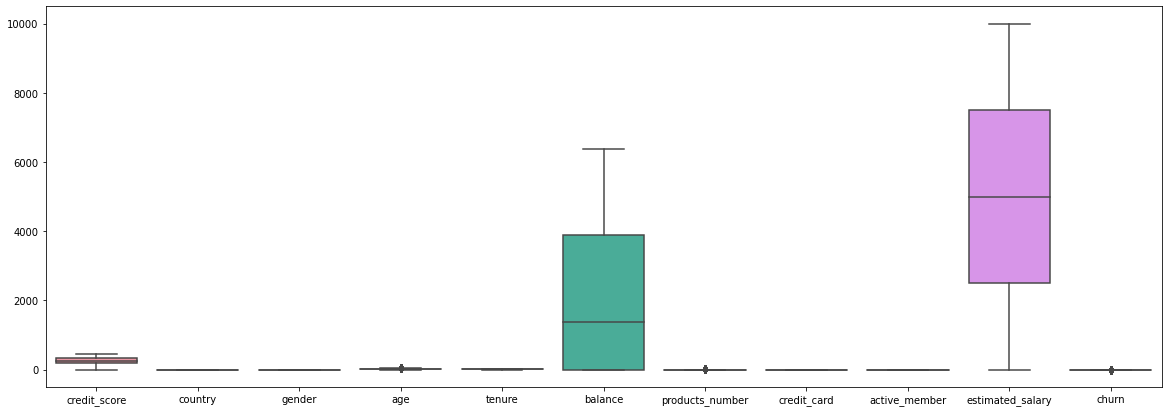

In [297]:
plt.figure(figsize=(20,7))
sns.boxplot(data = df)

#### The above diagram shows that all the predictors are not in the same range. So, it is advisable to scale all the features in same range for better modelling.
#### Scaling can be done in different ways like
1. Normalizing
2. Standardizing

- Normalization is effective when you know that your data is not following a Gaussian distribution(bell curve) and it scales the data in between 0 and 1.
- Standardization can be used when the data follows Gaussian distribution. However it need not necessarily be the exact Gaussian distribution but it is effective on a gaussianlly distributed data.

In [298]:
#from sklearn.preprocessing import StandardScaler
#sc=StandardScaler()
#df=sc.fit_transform(df)
#df

# Normalizing the data in the rings column beacuse the value is too high when compared to other independent variable

from sklearn import preprocessing

num_feat = ["credit_score","age","tenure","balance","products_number","credit_card","active_member","estimated_salary","churn"]
# Create x to store scaled values as floats
x = df[num_feat].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df[num_feat] = pd.DataFrame(x_scaled)




Converting all the features into the same scale

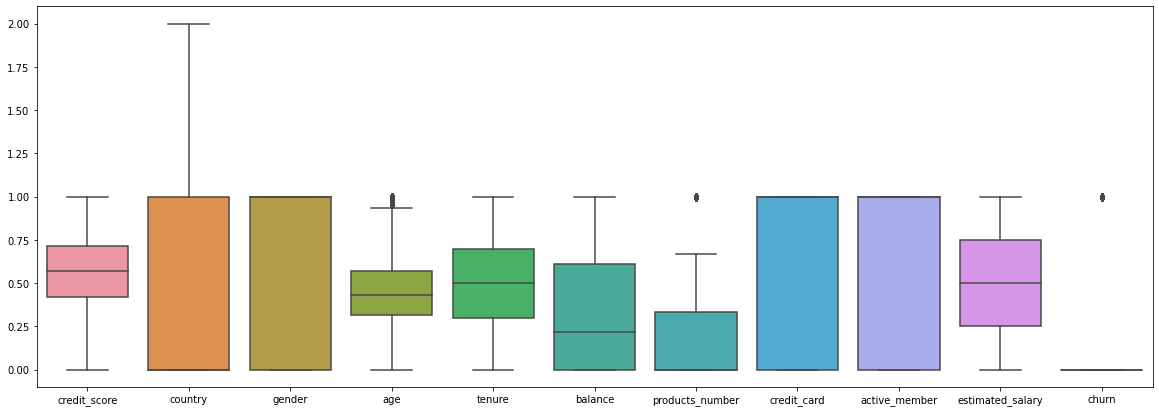

In [299]:
plt.figure(figsize=(20,7))
sns.boxplot(data = df)

All features are in same scale and are comparible.

#### **Feature Importance / Predictor Significance**
##### **Which predictor variables are the most important?**
Few independent variables contribute a lot in predicting target variable and few don't. This can be understood through various methods and helps in eliminating variables that contribute's less in the analysis

##### **HeatMap**
Heatmap shows the magnitude of a feature by visualizing the intensity through colours and helps in understanding features that matters the most

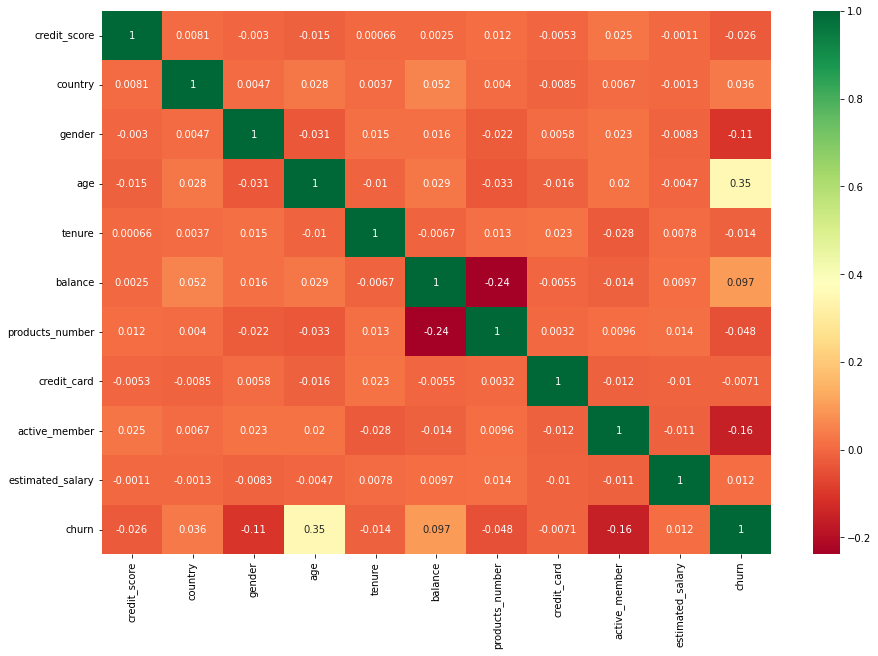

In [300]:
# heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot = True,cmap="RdYlGn")

#### OLS regression

Ordinary Lease Square Regressions tell us relationship between one or more independent variables with a dependent variable

In [301]:
cols = df.columns.tolist()
cols.remove("churn")
model = sm.OLS(df['churn'], df[cols]).fit()
model.summary() #sumarizes the stats

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  churn   R-squared (uncentered):                   0.337
Model:                            OLS   Adj. R-squared (uncentered):              0.337
Method:                 Least Squares   F-statistic:                              508.8
Date:                Sat, 04 Feb 2023   Prob (F-statistic):                        0.00
Time:                        21:53:32   Log-Likelihood:                         -4175.5
No. Observations:               10000   AIC:                                      8371.
Df Residuals:                    9990   BIC:                                      8443.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
credit_score        -0.0436      0.015     -2.910      0.004      -0.073      -0.014
country              0.0108      0.004      2.459      0.014       0.002       0.019
gender              -0.0778      0.007    -10.785      0.000      -0.092      -0.064
age                  0.7045      0.017     42.231      0.000       0.672       0.737
tenure              -0.0229      0.012     -1.904      0.057      -0.046       0.001
balance              0.0950      0.011      8.528      0.000       0.073       0.117
products_number     -0.0412      0.019     -2.159      0.031      -0.079      -0.004
credit_card         -0.0046      0.008     -0.602      0.547      -0.020       0.010
active_member       -0.1304      0.007    -18.020      0.000      -0.145      -0.116
estimated_salary     0.0098      0.012      0.819      0.413      -0.014       0.033
==============================================================================
Omnibus:                     1484.121   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2247.910
Skew:                           1.154   Prob(JB):                         0.00
Kurtosis:                       3.256   Cond. No.                         9.34
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### **Pointes to be noted:**
Considering the significance value of 0.05 according to the rule of thumb in statistics.

* `credit_score` has the p-value 0.04, which is lesser and hence it is a **significant** feature.
* `country` has the p-value 0.014, which is lesser and hence it is a **significant** feature.
* `gender` has the p-value 0, which is lesser and hence it is a **significant** feature.
*  `age` has the p-value 0, which is lesser and hence it is a **significant** feature.
*  `tenure` has the p-value 0.057, which is which is slightly more than the threshold value of 0.05 and hence it is a **non-significant** feature.
* `balance` has the p-value 0, which is lesser and hence it is a **significant** feature.
* `products_number` has the p-value 0.031, which is lesser and hence it is a **significant** feature.
* `credit_card` has the p-value 0.547, which is greater than the significant value i.e 0.05 and hence it is a **non-significant** feature.
* `active_member` has the p-value 0, which is lesser and hence it is a **significant** feature.
* `estimated_salary` has the p-value 0.413, which is greater and hence it is a **non-significant** feature.

#### **Permutation Importance : Let's calculate Feature weights using Permutation Importance.**

In [302]:
def get_permutation_importance(df):
    X = df[["credit_score","age","tenure","balance","products_number","credit_card","active_member","estimated_salary"]]
    y = df[["churn"]]
    X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
    X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.10, random_state=1)
    # Create linear regression object
    model = linear_model.LinearRegression()
    model.fit(X_train,y_train)
    pi = PermutationImportance(model, random_state=1).fit(X_test, y_test)
    return eli5.show_weights(pi, feature_names = X_test.columns.tolist())



#  https://scikit-learn.org/stable/modules/permutation_importance.html

In [303]:
get_permutation_importance(df)

Weight,Feature
0.2736 ± 0.0299,age
0.0517 ± 0.0191,active_member
0.0125 ± 0.0048,balance
0.0014 ± 0.0003,credit_score
0.0006 ± 0.0004,tenure
0.0004 ± 0.0004,products_number
-0.0001 ± 0.0009,estimated_salary
-0.0002 ± 0.0005,credit_card


It can be observed that we can drop `credit_card` and `estimated_salary` features for prediction modelling as they are non-significant in determining the `churn` feature. 

In [304]:
df = df.drop(['credit_card', 'estimated_salary'],axis = 1)
df

,credit_score,country,gender,age,tenure,balance,products_number,active_member,churn
0,0.496732,0,0,0.545455,0.2,0.000000,0.000000,1.0,1.0
1,0.472767,2,0,0.522727,0.1,0.116439,0.000000,1.0,0.0
2,0.241830,0,0,0.545455,0.8,0.907851,0.666667,0.0,1.0
3,0.671024,0,0,0.477273,0.1,0.000000,0.333333,0.0,0.0
4,1.000000,2,0,0.568182,0.2,0.579220,0.000000,1.0,0.0
...,...,...,...,...,...,...,...,...,...
9995,0.827887,0,1,0.477273,0.5,0.000000,0.333333,0.0,0.0
9996,0.272331,0,1,0.386364,1.0,0.019433,0.000000,1.0,0.0
9997,0.692810,0,0,0.409091,0.7,0.000000,0.000000,1.0,1.0
9998,0.830065,1,1,0.545455,0.3,0.066917,0.333333,0.0,1.0


##### **What are the distributions of the predictor variables?**

<Figure size 432x288 with 0 Axes>

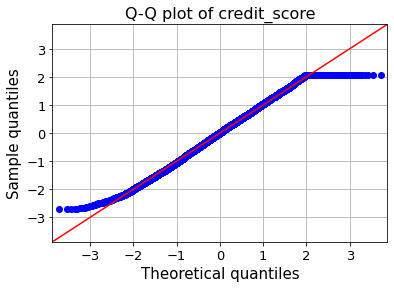

<Figure size 432x288 with 0 Axes>

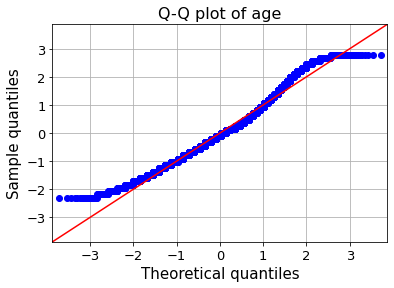

<Figure size 432x288 with 0 Axes>

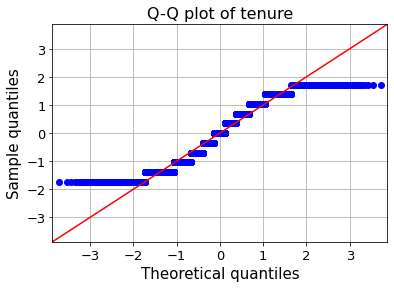

<Figure size 432x288 with 0 Axes>

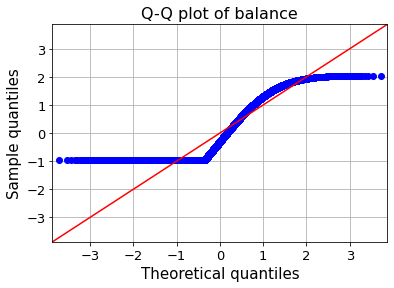

<Figure size 432x288 with 0 Axes>

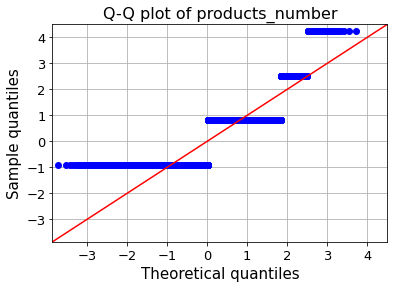

<Figure size 432x288 with 0 Axes>

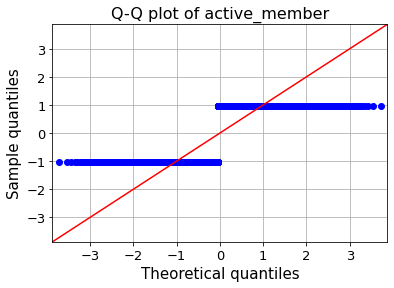

In [305]:
#checking the distribution of predictor variables
from statsmodels.graphics.gofplots import qqplot
norm_dist_data=df[['credit_score','age','tenure','balance','products_number','active_member']]
for c in norm_dist_data.columns[:]:
  plt.figure(figsize=(6,4))
  fig=qqplot(df[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

* By observing the Q-Q plots, it appears that all predictor variables are roughly following the normal distribution
* `active_member` is categorical value and have 2 different values namely 0 and 1 and `product_number` is limited to a set of 4 values.


#### **Oversampling**


Data in target variable is not balanced so over sampling is required and it helps in building a model with decent scores

In [306]:
class_Fail = df[df['churn'] == 0]
class_No_Fail = df[df['churn'] == 1]
class_No_Fail = class_No_Fail.sample(len(class_Fail),replace=True)
over_sampled_df = pd.concat([class_Fail, class_No_Fail], axis=0)


print('OverSampled Data Distribution:\n',over_sampled_df['churn'].value_counts())

OverSampled Data Distribution:
 0.0    7963
1.0    7963
Name: churn, dtype: int64


In [307]:
over_sampled_df

,credit_score,country,gender,age,tenure,balance,products_number,active_member,churn
1,0.472767,2,0,0.522727,0.1,0.116439,0.000000,1.0,0.0
3,0.671024,0,0,0.477273,0.1,0.000000,0.333333,0.0,0.0
4,1.000000,2,0,0.568182,0.2,0.579220,0.000000,1.0,0.0
6,0.938998,0,1,0.727273,0.7,0.000000,0.333333,1.0,0.0
8,0.239651,0,1,0.590909,0.4,0.777621,0.333333,1.0,0.0
...,...,...,...,...,...,...,...,...,...
6736,0.688453,0,0,0.886364,0.1,0.169879,0.000000,1.0,1.0
4217,0.427015,1,1,0.386364,0.5,0.527660,0.000000,1.0,1.0
5643,0.490196,2,0,0.409091,0.6,0.000000,0.000000,1.0,1.0
1962,0.004357,2,0,0.772727,0.8,0.792039,0.666667,0.0,1.0


Oversampling involves supplementing the training data with multiple copies of some of the minority classes 

#### **Splitting the dataset into Training and Test set**

In [308]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

independent_cols = ["credit_score","country","gender","age","tenure","balance","products_number","active_member"]

X = over_sampled_df[independent_cols]
y = over_sampled_df["churn"]
# using the train test split function
#X_train ,X_test ,y_train ,y_test = train_test_split(X,y,train_size=0.8,random_state=42,startify=y)
X_train, X_test,y_train, y_test = train_test_split(X,y ,random_state=42,train_size=0.8,stratify=y)

print('X_train : ')
print(X_train.head())
print('')
print('X_test : ')
print(X_test.head())
print('')
print('y_train : ')
print(y_train.head())
print('')
print('y_test : ')
print(y_test.head())

X_train : 
      credit_score  country  gender       age  tenure   balance  \
915       0.446623        0       1  0.659091     0.6  0.000000   
9073      0.677560        1       0  0.954545     0.5  0.741890   
3666      0.675381        2       0  0.068182     0.9  0.000000   
6336      0.315904        1       0  0.386364     0.4  0.522489   
7397      0.394336        1       1  0.659091     0.4  0.241498   

      products_number  active_member  
915          0.000000            0.0  
9073         0.333333            1.0  
3666         0.333333            1.0  
6336         0.000000            0.0  
7397         0.000000            0.0  

X_test : 
      credit_score  country  gender       age  tenure   balance  \
809       0.579521        0       0  0.431818     0.6  0.202163   
2785      0.542484        0       1  0.568182     0.7  0.670585   
2592      0.248366        1       1  0.500000     0.6  0.010500   
2513      0.599129        0       1  0.477273     1.0  0.000000   
8405  

In [309]:
# Looking the data for test and training 
	
independent_cols = ["credit_score","age","tenure","balance","products_number","active_member"]
X_test_plot = X_test[independent_cols]
X_train_plot = X_train[independent_cols]

check_df = pd.merge(
    X_train,
    X_test,
    on=[
        "country","gender","credit_score","age","tenure","balance","products_number","active_member",],
    how="left",
    indicator="Exist",
)
#check_df.drop("Item_Outlet_Sales", inplace=True, axis=1)
check_df["Exist"] = np.where(check_df.Exist == "both", True, False)
print(
    check_df["Exist"].value_counts()
)  # This code prints the number of unique data rows in training colomns



False    9221
True     5044
Name: Exist, dtype: int64


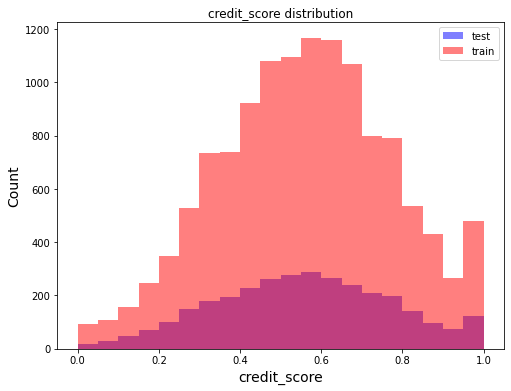

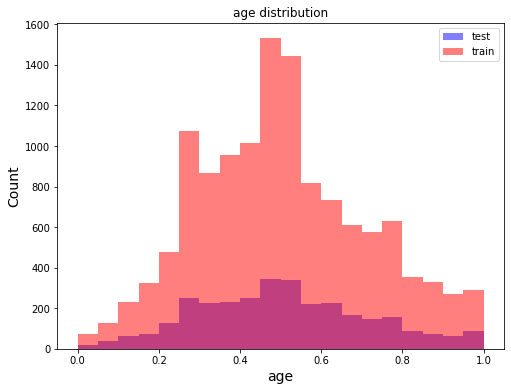

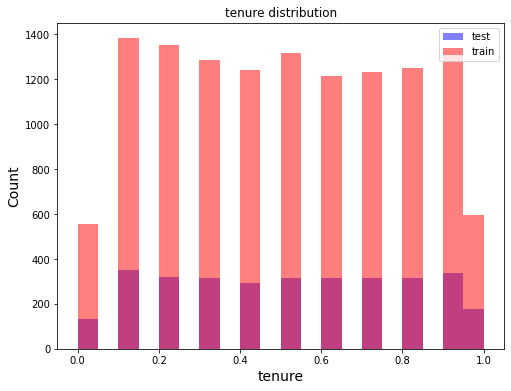

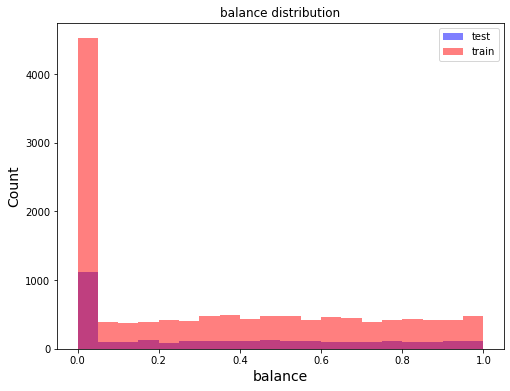

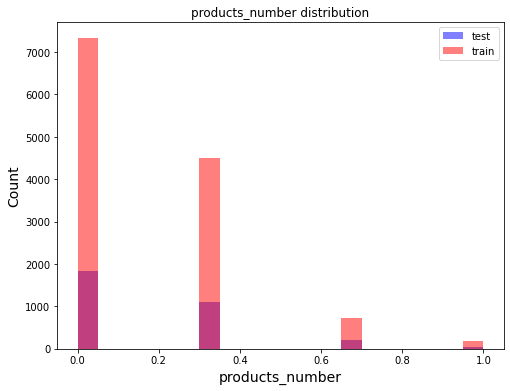

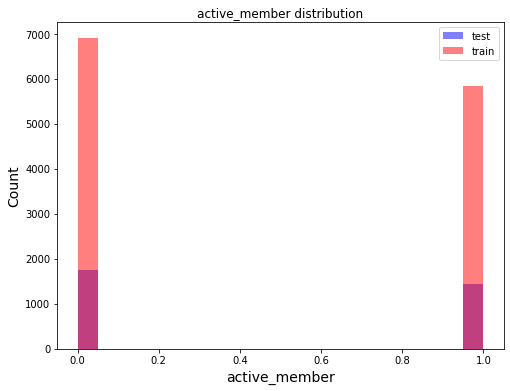

In [310]:
# Plotting the data to see the histogram
for col in X_test_plot.columns[:]:
    plt.figure(figsize=(8,6))
    
    plt.hist(X_test_plot[col], bins=20, alpha=0.5, label="test",color = 'b')
    plt.hist(X_train_plot[col], bins=20, alpha=0.5, label="train",color = 'r')
    plt.xlabel(col, size=14)
    plt.ylabel("Count", size=14)
    
    plt.legend(loc='upper right')
    plt.title("{} distribution".format(col))
    plt.show()

#### Do the training and test sets have the same data?

Yes, from above graphs its evident that the distributions are almost same for all train and test sets except few mid values in `credit_score` and `age`.

#### **Modeling**

##### **With imputed outliers**

In [311]:
#Implementing Logistic Regression using sklearn
modelLogistic = LogisticRegression()
modelLogistic.fit(X_train,y_train)

#printing the regression coefficients

print("The intercept b0= ", modelLogistic.intercept_)

print("The coefficient b1= ", modelLogistic.coef_)

The intercept b0=  [-1.68432878]
The coefficient b1=  [[-0.38329227  0.08999956 -0.57774499  4.75615139 -0.16148816  0.78625894
  -0.22965202 -0.87028145]]


In [312]:
lr_y_predict = modelLogistic.predict(X_test)

print("Model Performance with Test set")

d = [ ["Accuracy_score", f'{round(accuracy_score(y_test,lr_y_predict),2)}'],
     ["Precission_score", f'{round(precision_score(y_test,lr_y_predict),2)}'],
     ["Recall_score", f'{round(recall_score(y_test,lr_y_predict),2)}'],
     ["F1-score",f'{round(f1_score(y_test,lr_y_predict),2)}']]

print(tabulate(d, headers=["Metrics", "Score"]))

print("-----------------------------------------------")


Model Performance with Test set
Metrics             Score
----------------  -------
Accuracy_score       0.71
Precission_score     0.71
Recall_score         0.71
F1-score             0.71
-----------------------------------------------


#### **Summary till now:**
**EDA** - verify data distribution, box plots, heat maps (just numerical), so far no encoding, will know missing and outliers

- missing values imputed for both category and numerical data, outlier handling, and scaling (needs outlier handling to avoid skewness)
- for category encoding

We have completed all numerical data eda and preparation.

- now check heatmap with all numerical data , and ols regression , VIF for knowing more dependent feature.
so far features selected 


train test split
permutation 
remove feature from train and test for modeling

make sure that we have same distritbution in train and test

- check if train test val have same distribution before final modeling




#### **With Outliers**

In dataframe `df_with_outliers` which has outliers , we converting the categorical values of gender and country to numerical values.

In [313]:
df_with_outliers.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [314]:
#converting the categorical values of gender and country to numerical values in dataset with outliers
#df = pd.get_dummies(df, prefix='Is', drop_first=True)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for column in df_with_outliers.columns:
    # Fit the label encoder to the dataframe column
    le.fit(df_with_outliers[column])
    # Replace the dataframe column with the encoded values
    df_with_outliers[column] = le.transform(df_with_outliers[column])

print(df_with_outliers)

      credit_score  country  gender  age  tenure  balance  products_number  \
0              228        0       0   24       2        0                0   
1              217        2       0   23       1      743                0   
2              111        0       0   24       8     5793                2   
3              308        0       0   21       1        0                1   
4              459        2       0   25       2     3696                0   
...            ...      ...     ...  ...     ...      ...              ...   
9995           380        0       1   21       5        0                1   
9996           125        0       1   17      10      124                0   
9997           318        0       0   18       7        0                0   
9998           381        1       1   24       3      427                1   
9999           401        0       0   10       4     4112                0   

      credit_card  active_member  estimated_salary  churn  
0  

The features `country` and `gender` have been converted to numerical notations to predict accuracy of dataframe with outliers.

#### Oversampling with outliers

In [315]:
class_Fail_out = df_with_outliers[df_with_outliers['churn'] == 0]
class_No_Fail_out = df_with_outliers[df_with_outliers['churn'] == 1]
class_No_Fail_out = class_No_Fail_out.sample(len(class_Fail_out),replace=True)
over_sampled_df_out = pd.concat([class_Fail_out, class_No_Fail_out], axis=0)


print('OverSampled Data Distribution:\n',over_sampled_df_out['churn'].value_counts())

OverSampled Data Distribution:
 0    7963
1    7963
Name: churn, dtype: int64


In [316]:
df_with_outliers = df_with_outliers.drop(['credit_card', 'estimated_salary'],axis = 1)
df_with_outliers

,credit_score,country,gender,age,tenure,balance,products_number,active_member,churn
0,228,0,0,24,2,0,0,1,1
1,217,2,0,23,1,743,0,1,0
2,111,0,0,24,8,5793,2,0,1
3,308,0,0,21,1,0,1,0,0
4,459,2,0,25,2,3696,0,1,0
...,...,...,...,...,...,...,...,...,...
9995,380,0,1,21,5,0,1,0,0
9996,125,0,1,17,10,124,0,1,0
9997,318,0,0,18,7,0,0,1,1
9998,381,1,1,24,3,427,1,0,1


#### **Train , Test and Validation split with outliers**





In [317]:
independent_cols = ["credit_score","country","gender","age","tenure","balance","products_number","active_member"]
X_out = over_sampled_df_out[independent_cols]
y_out = over_sampled_df_out["churn"]
# splitting train and test data
X_train_out, X_test_out, y_train_out, y_test_out = train_test_split(X_out, y_out, random_state=1,train_size=0.8,stratify=y)


In [318]:
modelLogistic_out = LogisticRegression()
modelLogistic_out.fit(X_train_out,y_train_out)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [319]:
lr_y_predict_out = modelLogistic_out.predict(X_test_out)

print("Model Performance with Test set")

d = [ ["Accuracy_score", f'{round(accuracy_score(y_test_out,lr_y_predict_out),2)}'],
     ["Precission_score", f'{round(precision_score(y_test_out,lr_y_predict_out),2)}'],
     ["Recall_score", f'{round(recall_score(y_test_out,lr_y_predict_out),2)}'],
     ["F1-score",f'{round(f1_score(y_test_out,lr_y_predict_out),2)}']]

print(tabulate(d, headers=["Metrics", "Score"]))
print("-----------------------------------------------")

Model Performance with Test set
Metrics             Score
----------------  -------
Accuracy_score       0.69
Precission_score     0.69
Recall_score         0.69
F1-score             0.69
-----------------------------------------------


####  **Remove outliers and keep outliers (does if have an effect of the final predictive model)?**

Yes, it does have a small difference in scores with and with out outliers.


- All the four scores `Accuracy_score` , `Precision_score` , `Recall_score` and `F1-score` are on the lower end when compared to scores with outlier imputation.

- `Accuracy_score` , `Precision_score` and `F1-score` are improved by 3% and `Recall_score` improved by 2% with outlier imputation.

To conclude, there is an improvement in scores with imputed outliers. This can possibly be due to better distribution after outlier imputation.

#### **Imputing Null values**

In [320]:
def null_impute_with_mean(percent , feature , impute_feature):
    df_null = df_copy.copy()
    df_null[f"{impute_feature}"] = df_null[f"{feature}"]

    df_null.loc[df_null.sample(frac=percent).index,f'{impute_feature}'] = np.NaN

    # Imputing Null values with mean

    df_null[f"{impute_feature}"] = df_null[f"{impute_feature}"].fillna(df_null[f"{impute_feature}"].mean()) 
    mse = mean_squared_error(df_null[f"{feature}"], df_null[f"{impute_feature}"])

    print(f"Error after imputing {percent*100} values is {round(mse,2)*100}%")

In [321]:
#  Removing 1% data and imputing
null_impute_with_mean(0.01 ,"active_member" ,"active_member_imputed")

Error after imputing 1.0 values is 0.0%


In [322]:
#  Removing 5% data and imputing with mean

null_impute_with_mean(0.05 ,"active_member" ,"active_member_imputed")

Error after imputing 5.0 values is 1.0%


In [323]:
#  Removing 10% data and imputing

null_impute_with_mean(0.10 ,"active_member" ,"active_member_imputed")

Error after imputing 10.0 values is 2.0%


In [324]:
def null_impute_with_median(percent , feature , impute_feature):
    df_null = df_copy.copy()
    df_null[f"{impute_feature}"] = df_null[f"{feature}"]

    df_null.loc[df_null.sample(frac=percent).index,f'{impute_feature}'] = np.NaN

    # Imputing Null values with median

    df_null[f"{impute_feature}"] = df_null[f"{impute_feature}"].fillna(df_null[f"{impute_feature}"].median()) 
    mede = mean_squared_error(df_null[f"{feature}"], df_null[f"{impute_feature}"])

    print(f"Error after imputing {percent*100} values is {round(mede,2)*100}%")

In [325]:
null_impute_with_median(0.01 ,"active_member" ,"active_member_imputed")

Error after imputing 1.0 values is 0.0%


In [326]:
#  Removing 5% data and imputing with median

null_impute_with_median(0.05 ,"active_member" ,"active_member_imputed")

Error after imputing 5.0 values is 2.0%


In [327]:
#  Removing 10% data and imputing with median

null_impute_with_median(0.10 ,"active_member" ,"active_member_imputed")

Error after imputing 10.0 values is 5.0%


##### KNN Imputation

In [328]:
from sklearn.impute import KNNImputer

# Generate random data
#np.random.seed(0)
#data = np.random.rand(100, 5)
#np.random.seed(0)
#data = df[['credit_score','age','tenure','balance','products_number','active_member']]
data = df[['credit_score']]
#df_copy.copy()

#np.random.seed(0)
#data = df[['credit_score']]

# Remove 1%, 5%, and 10% of the data
missing_rates = [0.01, 0.05, 0.1]

for missing_rate in missing_rates:
    missing_data = np.copy(data)
    num_missing = int(missing_rate * missing_data.size)
    missing_indices = np.random.choice(missing_data.size, num_missing, replace=False)
    missing_data.flat[missing_indices] = np.nan
    
    # Impute the missing values using the KNN imputation method
    imputer = KNNImputer(n_neighbors=5)
    imputed_data = imputer.fit_transform(missing_data)
    
    # Calculate the residual error between the original and imputed data
    residual_error = np.abs(data - imputed_data)
   
    percentage_error = np.mean(residual_error / data) * 100
    
    print(f" Percentage error for missing rate {missing_rate * 100}%: {round(percentage_error,2)}% ")
    
    
    # Calculate the bias and variance of the error
    #bias = np.mean(residual_error)
    #variance = np.var(residual_error)
    #print(f"Bias for missing rate {missing_rate}: {round(bias,2)}%")
    #print(f"Variance for missing rate {missing_rate}: {round(variance,2)}%")


 Percentage error for missing rate 1.0%: credit_score    0.67
dtype: float64% 
 Percentage error for missing rate 5.0%: credit_score    2.16
dtype: float64% 
 Percentage error for missing rate 10.0%: credit_score    5.23
dtype: float64% 


There are no high significant difference in error other than 2-3% by imputing mean,median and knn respectively

#### **Confusion Matrix**

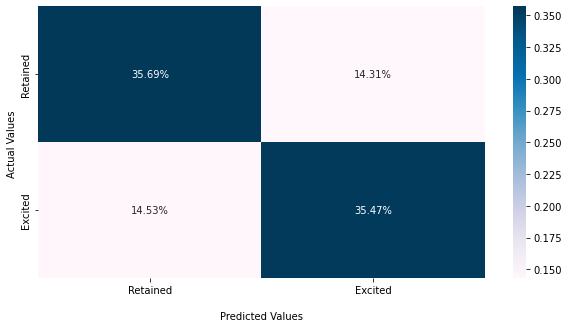

In [329]:
con_matrix = confusion_matrix(y_test,lr_y_predict)
plt.figure(figsize=(10,5))
ax = sns.heatmap(con_matrix/np.sum(con_matrix),fmt='.2%', annot=True, cmap='PuBu')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['Retained','Excited'])
ax.yaxis.set_ticklabels(['Retained','Excited'])
plt.show()

### **Conclusion**

From above analysis :

* The data has both numerical and categorical
* `age` has extreme outliers and handled later for improved results and also `credit_score` has minimal outliers.
* over sampling helped in getting more data as the target distribution is unbalanced.
* The data has no null values 
* Feature scaling is done using min max scaler to get all the feature range between 0 and 1 
* Multi colinearity is observed in some features and removed it after checking permutation importance
* Important features are selected and considered for modeling
* Slight difference in model performance is observed with outlier unhandled vs outliers handled.


### References:

1. Permutation importance is refered from scikit-learn permutation handling concept document https://scikit-learn.org/stable/modules/permutation_importance.html
2. Outlier Imputation is refered from sklearn "logistic-regression-using-python-and-excel" explanation
3. GeeksForGeeks Quantile-Quantile plot documentation https://www.geeksforgeeks.org/qqplot-quantile-quantile-plot-in-python/
4. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
5. Matplotlib documentation
6. Outlier handling is referec from analytics vidhya outlier handling theoritical explanation https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/
7. Modeling is refered from scikit-learn logistic regression officiakl documentatio
8. Refered Kaggle contributions for oversampling  

All other code and function implementation are independently written.


Copyright 

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.